# GENERATE THE SPECTRUM PLOT WITH MULTI LINES

In [1]:
###### import the necessary libraries ######    
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from spectral_cube import SpectralCube
from astropy.io import fits
from astropy.wcs import WCS
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord, SkyOffsetFrame, SpectralQuantity
from astropy.wcs.utils import skycoord_to_pixel

In [25]:

#file1 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/TESTS/spectrumNORTH_CF+_N159_sci_VELAXIS.fits'
#file2 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/TESTS/SPECT_POSITION_NORTH_CII_N159_SPAT_RES.fits'
file1 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/TESTS/spectrumSOUTH_CF+_N159_SPAT_RES.fits'
file2 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/TESTS/spectrumSOUTH_CII_N159_SPAT_RES.fits'
#file1 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/TESTS/spectrum_CF+_N159_sci_VELAXIS_29arcs.fits'
#file3 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/FILES/CF+_DATAS/CF+_APEX_DATA/av_CF21.fits'
#file4 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/FILES/CF+_DATAS/CF+_APEX_DATA/av_CF32.fits'
file3 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/N159_Data_Okada/SOFIA_GREAT_[13CII]_positions/data/SOFIA/GREAT/L4/p9578/data/N159_CII.fits'

vmin = 200 * u.km/u.s # km/s
vmax = 270 * u.km/u.s # km/s

#coord = SkyCoord('05h39m36.5s', '-69d45m35.0s', frame='icrs') # used on proposal APEX
coord = SkyCoord('05h39m37.8s', '-69d45m09.9s', frame='icrs') # position 1 in yoko et al. 2019

# RA y Dec en formato sexagesimal (HH:MM:SS, DD:MM:SS)
ra_str = coord.ra.to_string(unit=u.hour, sep=':', precision=3, pad=True)   
dec_str = coord.dec.to_string(unit=u.deg, sep=':', precision=3, alwayssign=True, pad=True) 
print('Coordinates to extract the spectrum (ICRS):', ra_str, dec_str)

Coordinates to extract the spectrum (ICRS): 05:39:37.800 -69:45:09.900


In [26]:
hdul1 = fits.open(file1)
hdul2 = fits.open(file2) 
hdul_class = fits.open(file3)
#hdul4 = fits.open(file4)
print(hdul1.info())
print(hdul2.info())
#print(hdul3.info())
#print(hdul4.info())

spect1 = hdul1[0].data
spect2 = hdul2[0].data
#spect3 = hdul3[1].data
#spect4 = hdul4[0].data
print(spect1)
print(spect2)
#print(spect3)
#print(spect4)
print('--------------------')
print(spect1.max())
print(spect2.max())
#print(spect3.max())
#print(spect4.max())

header1 = hdul1[0].header
header2 = hdul2[0].header
header3_1 = hdul_class[0].header
header3_2 = hdul_class[1].header
#header4 = hdul4[0].header
#print(repr(header1))
#print(repr(header2))
print(repr(header3_1))
print(repr(header3_2))
#print(repr(header4))


# Cerrar los archivos FITS que abriste
hdul1.close()
hdul2.close()
#hdul3.close()
#hdul4.close()

Filename: C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/TESTS/spectrumSOUTH_CF+_N159_SPAT_RES.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   (729,)   float64   
None
Filename: C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/TESTS/spectrumSOUTH_CII_N159_SPAT_RES.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   (300,)   float64   
None
[ 5.30428198e-05 -2.21922606e-03  2.43316313e-03 -1.21790888e-03
  3.29266213e-03 -7.95927634e-05 -1.08867951e-03  2.07304126e-04
  2.82864159e-03  2.20413144e-03 -6.95306556e-04 -1.92548969e-04
  1.35006637e-03 -5.47261465e-05  2.34472608e-04  2.42676794e-03
  1.92501742e-03  1.03704797e-03  1.21646329e-03  1.44667114e-04
  1.89233050e-03  2.54589472e-03 -8.03170643e-04 -2.29038405e-03
 -1.95163105e-03  1.33957683e-03 -5.08170874e-05 -9.27830373e-04
 -3.11781828e-03  4.90207511e-04 -4.08886130e

In [27]:
nchan1 = header1['NAXIS1']
nchan2 = header2['NAXIS1']
#nchan3 = header3['NAXIS1']
#nchan4 = header4['NAXIS1']

print('NAXIS3 file 1:', nchan1)
print('NAXIS3 file 2:', nchan2)
#print('NAXIS3 file 3:', nchan3)

wcs1 = WCS(header1)
wcs2 = WCS(header2)
#wcs3 = WCS(header3)
#wcs4 = WCS(header4)

print(wcs1)
print(wcs2)
#print(wcs3)

NAXIS3 file 1: 729
NAXIS3 file 2: 300
WCS Keywords

Number of WCS axes: 1
CTYPE : 'VRAD' 
CRVAL : -129000.00000003 
CRPIX : 1.0 
PC1_1  : 1.0 
CDELT : 1000.0 
NAXIS : 729  0
WCS Keywords

Number of WCS axes: 1
CTYPE : 'VELO' 
CRVAL : 187000.0 
CRPIX : 150.0 
PC1_1  : 1.0 
CDELT : 1000.0 
NAXIS : 300  0


In [28]:
# Create the spectral axis
# --------------------------Extract necessary parameters file 1---------------------------------------
# Extract necessary parameters
RESTFRQ1 = header1['RESTFRQ'] 
UNIT1 = header1['CUNIT1']
crval1 = header1['CRVAL1']  # Reference velocity (km/s)
crpix1 = header1['CRPIX1']  # Reference pixel
cdelt1 = header1['CDELT1']  # Velocity increment (km/s/pixel)


index1 = np.arange(1, nchan1 + 1)
VEL1 = crval1 + (index1 - crpix1) * cdelt1
VEL1 = VEL1*(u.km/u.s)


# Print results
print("Spectral axis (first 5 values):", VEL1[:5])
# Filter data for the desired velocity range
# For spect1 (spectral_axis is 1D array in km/s)
mask1 = (VEL1 >= vmin) & (VEL1 <= vmax)
vel1_filtered = VEL1[mask1]
spect1_filtered = spect1[mask1]


Spectral axis (first 5 values): [-129. -128. -127. -126. -125.] km / s


In [29]:

# Create the spectral axis
# --------------------------Extract necessary parameters file 2---------------------------------------
# Extract necessary parameters
RESTFRQ2 = header2['RESTFRQ'] * u.Hz
UNIT2 = header2['CUNIT1']
crval2 = header2['CRVAL1'] * u.km/u.s # Reference velocity (km/s)
crpix2 = header2['CRPIX1']  # Reference pixel
cdelt2 = header2['CDELT1'] * u.km/u.s # Velocity increment (km/s/pixel)


index2 = np.arange(1, nchan2 + 1)
VEL2 = crval2 + (index2 - crpix2) * cdelt2
VEL2 = VEL2.to(u.km/u.s)


# Print results
print("Spectral axis (first 5 values):", VEL2[:5])


# For spect2 (VEL2 is in km/s with units)
mask2 = (VEL2 >= vmin) & (VEL2 <= vmax)
vel2_filtered = VEL2[mask2]
spect2_filtered = spect2[mask2]

print(vel2_filtered.shape)

Spectral axis (first 5 values): [38. 39. 40. 41. 42.] km / s
(71,)


In [20]:
# Create the spectral axis
# --------------------------Extract necessary parameters file 2---------------------------------------
# Extract necessary parameters
RESTFRQ3 = header3['RESTFRQ'] * u.Hz
UNIT3 = header3['CUNIT1']
crval3 = header3['CRVAL1'] * u.km/u.s # Reference velocity (km/s)
crpix3 = header3['CRPIX1']  # Reference pixel
cdelt3 = header3['CDELT1'] * u.km/u.s # Velocity increment (km/s/pixel)


index3 = np.arange(1, nchan3 + 1)
VEL3 = crval3 + (index3 - crpix3) * cdelt3
VEL3 = VEL3.to(u.km/u.s)


# Print results
print("Spectral axis (first 5 values):", VEL3[:5])
# Filter data for the desired velocity range
# For spect1 (spectral_axis is 1D array in km/s)
mask3 = (VEL3 >= vmin) & (VEL3 <= vmax)
vel3_filtered = VEL3[mask3]
spect3_filtered = spect3[mask3]

NameError: name 'header3' is not defined

In [34]:

def read_class_fit(hdul_class):
    #1) load spectra data into array
    n_spectra = hdul_class[1].header["NAXIS2"]
    n_channels = hdul_class[1].header["NAXIS1"]
    data_spectra = np.zeros((n_spectra,n_channels))
    for i in range(0,n_spectra):
        data_spectra[i] = hdul_class[1].data[i]['AVEIM']
    #2) load vel axis
    refv = hdul_class[1].header["VELO-LSR"]
    step = hdul_class[1].header["DELTAV"]
    stepbin = step/1e3
    refp = hdul_class[1].header["CRPIX1"]
    vel_axis = (np.arange(n_channels) - refp) * step + refv
    vel_axis = vel_axis/1e3
    return data_spectra,vel_axis


In [35]:
VEL3 = vel_axis
spect3 = data_spectra
print(VEL3)
print(spect3)


NameError: name 'vel_axis' is not defined

In [ ]:

# Print results
print("Spectral axis (first 5 values):", VEL3[:5])
# Filter data for the desired velocity range
# For spect1 (spectral_axis is 1D array in km/s)
mask3 = (VEL3 >= vmin) & (VEL3 <= vmax)
vel3_filtered = VEL3[mask3]
spect3_filtered = spect3[mask3]

NameError: name 'VEL3' is not defined

In [24]:
def read_class_fit(hdul_class):
    # 1) Inspect the FITS table structure
    table = hdul_class[1].data
    n_spectra = hdul_class[1].header.get("NAXIS2", 1)  # Number of rows (should be 1)
    aveim = table['AVEIM'][0]  # Get the AVEIM array
    print("AVEIM shape:", aveim.shape)  # Debug: Check the shape of AVEIM

    # Check if AVEIM is 2D (1200, 20) or needs reshaping
    if len(aveim.shape) == 2 and aveim.shape == (1200, 20):
        data_spectra = aveim.T  # Transpose to (20, 1200) for (n_spectra, n_channels)
    elif aveim.shape == (20,):  # If AVEIM is 1D with 20 elements, something's wrong
        raise ValueError("AVEIM is 1D with shape (20,); expected 2D array (1200, 20). Check FITS file structure.")
    else:
        # Try to reshape or handle unexpected shapes
        try:
            data_spectra = aveim.reshape(20, -1)  # Reshape to (20, n_channels)
        except:
            raise ValueError(f"Cannot reshape AVEIM with shape {aveim.shape} into (20, n_channels).")

    n_spectra, n_channels = data_spectra.shape
    print("data_spectra shape:", data_spectra.shape)

    # 2) Load velocity axis
    refv = hdul_class[1].header['VEL']
    step = hdul_class[1].header['DELTAV']
    stepbin = step/1e3
    refp = hdul_class[1].header['CRPIX1']
    vel_axis = (np.arange(n_channels) - refp) * step + refv
    vel_axis = vel_axis/1e3
    return data_spectra, vel_axis

spect3=data_spectra
VEL3=vel_axis

# Print shape and check for NaNs
print("spect3 shape:", spect3.shape)
print("Number of NaNs in spect3:", np.sum(np.isnan(spect3)))

print(VEL3)
# Create velocity mask
mask3 = (VEL3 >= vmin) & (VEL3 <= vmax)
vel3_filtered = VEL3[mask3]
spect3_filtered = spect3[:, mask3]  # Shape: (20, len(vel3_filtered))

# Handle NaNs (replace with 0 for plotting)
spect3_filtered = np.nan_to_num(spect3_filtered, nan=0.0)

print(spect3_filtered)
print(spect3_filtered.shape)
print('--------------')
print(vel3_filtered)

NameError: name 'data_spectra' is not defined

In [ ]:
# Create the spectral axis
# --------------------------Extract necessary parameters file 4---------------------------------------
# Extract necessary parameters
RESTFRQ4 = header4['RESTFRQ'] * u.Hz
UNIT4 = header4['CUNIT1']
crval4 = header4['CRVAL1'] * u.km/u.s # Reference velocity (km/s)
crpix4 = header4['CRPIX1']  # Reference pixel
cdelt4 = header4['CDELT1'] * u.km/u.s # Velocity increment (km/s/pixel)


index4 = np.arange(1, nchan4 + 1)
VEL4 = crval4 + (index4 - crpix4) * cdelt4
VEL4 = VEL4.to(u.km/u.s)


# Print results
print("Spectral axis (first 5 values):", VEL4[:5])
# Filter data for the desired velocity range
# For spect1 (spectral_axis is 1D array in km/s)
mask4 = (VEL4 >= vmin) & (VEL4 <= vmax)
vel4_filtered = VEL4[mask4]
spect4_filtered = spect4[mask4]

KeyError: "Keyword 'RESTFRQ' not found."

ValueError: x and y must have same first dimension, but have shapes (140,) and (20, 140)

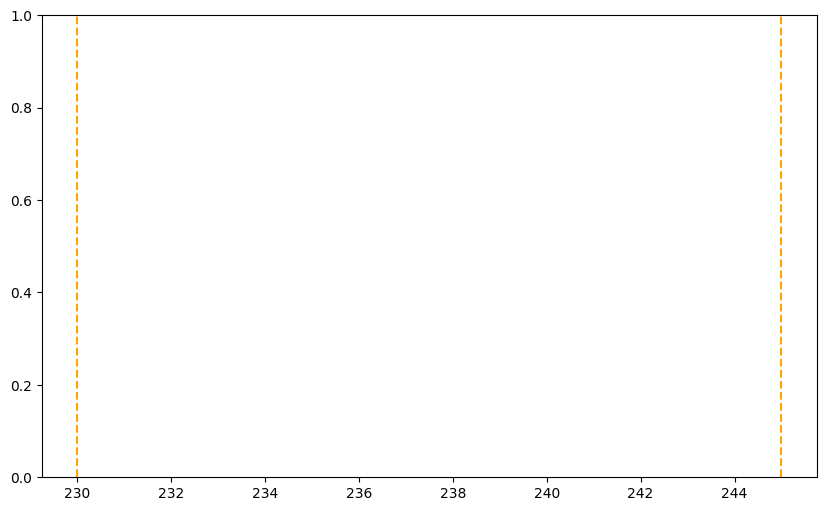

In [ ]:


#print(spect1_filtered.max())
#print(spect2_filtered.max())

# Create the plot
plt.figure(figsize=(10, 6))
plt.axvline(x=230, color='orange', linestyle='--', linewidth=1.5)

# Línea en 245 km/s
plt.axvline(x=245, color='orange', linestyle='--', linewidth=1.5)
#plt.step(vel1_filtered, spect1_filtered , label=r'$CF^+(1-0)$ ', color='green')
#plt.step(vel2_filtered, spect2_filtered*0.002, label=r'[CII]' , color='red')
plt.step(vel3_filtered, spect3_filtered , label=r'[$^{13}CII$]', color='olive')
#plt.step(vel4_filtered, 0.25+spect4_filtered/spect4_filtered.max(), label=r'$C^+$ (C$^+$ peak)', color='magenta')


plt.xlabel(r'Radial Velocity (km s$^{-1}$)',fontsize=15)
plt.ylabel(r'$T_{mb}$ (K)', fontsize=15)
#plt.title(f'Spectrum at position: {ra_str}, {dec_str}', fontsize=20)
plt.legend()
plt.grid(True)
plt.xlim(210,265)
plt.tight_layout()


plt.show()

### Lecture of APEX's Data spectrum

In [ ]:


# Función para calcular el eje de velocidad
def freq_to_velocity(freq, restfreq):
    c = const.c.to(u.km/u.s).value  # Velocidad de la luz en km/s
    return c * (restfreq - freq) / restfreq

# Función para procesar un archivo FITS
def process_fits_file(fits_file, label):
    # Abrir el archivo FITS
    hdul = fits.open(fits_file)
    data = hdul[0].data.flatten()  # Extraer datos (intensidad, asumiendo 1D)
    header = hdul[0].header

    # Extraer información del header
    naxis1 = header['NAXIS1']  # Número de canales
    crval1 = header['CRVAL1'] *u.Hz# Frecuencia de referencia
    cdelt1 = header['CDELT1']  *u.Hz# Resolución en frecuencia
    crpix1 = header['CRPIX1']  # Canal de referencia
    restfreq = header['RESTFREQ'] *u.Hz # Frecuencia de reposo (Hz)
    bunit = header.get('BUNIT', 'K')  # Unidad de intensidad

    # Crear el eje de canales
    channels = np.arange(naxis1)
    # Calcular el eje de frecuencia (Hz)
    #freq = crval1 + (channels - (crpix1 - 1)) * cdelt1
    freq = restfreq + crval1 + (channels - crpix1) * cdelt1
    # Convertir a velocidad (km/s)
    velocity = freq_to_velocity(freq, restfreq) + 235
    
    # Cerrar el archivo
    hdul.close()
    return velocity, data, bunit, label

# Archivos FITS (reemplaza con las rutas correctas)
fits_file1 = file3
fits_file2 = file4

# Procesar ambos archivos
velocity1, data1, bunit1, label1 = process_fits_file(fits_file1, r'CF$^+$ (2-1) (29")')
velocity1 = velocity1*(u.km/u.s)
velocity2, data2, bunit2, label2 = process_fits_file(fits_file2, r'CF$^+$ (3-2) (19")')
velocity2 = velocity2*(u.km/u.s)

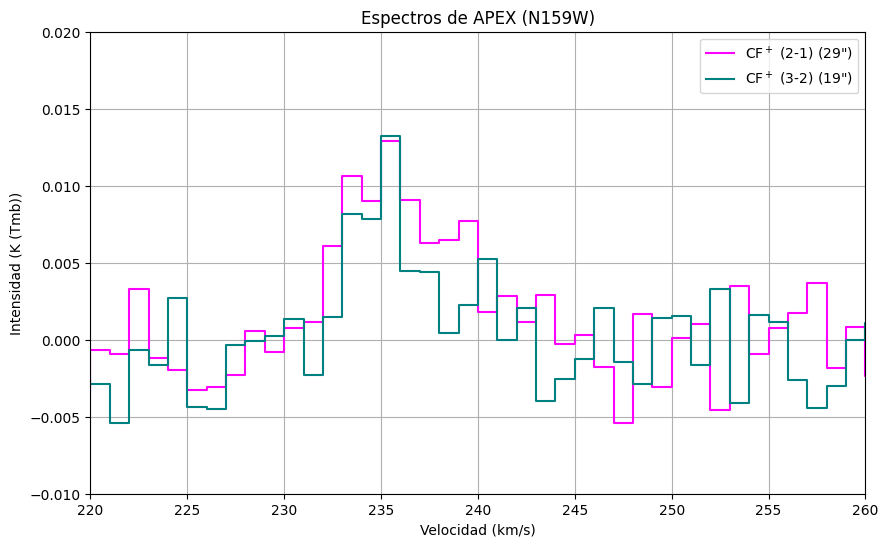

In [ ]:



# Crear el plot
plt.figure(figsize=(10, 6))
plt.step(velocity1, data1, label=label1, color='magenta', alpha=1)
plt.step(velocity2, data2, label=label2, color='teal', alpha=1)
plt.xlabel('Velocidad (km/s)')
plt.ylabel(f'Intensidad ({bunit1})')
plt.title('Espectros de APEX (N159W)')
plt.xlim(220, 260)
plt.ylim(-0.01, 0.02)
plt.legend()
plt.grid(True)
plt.show()

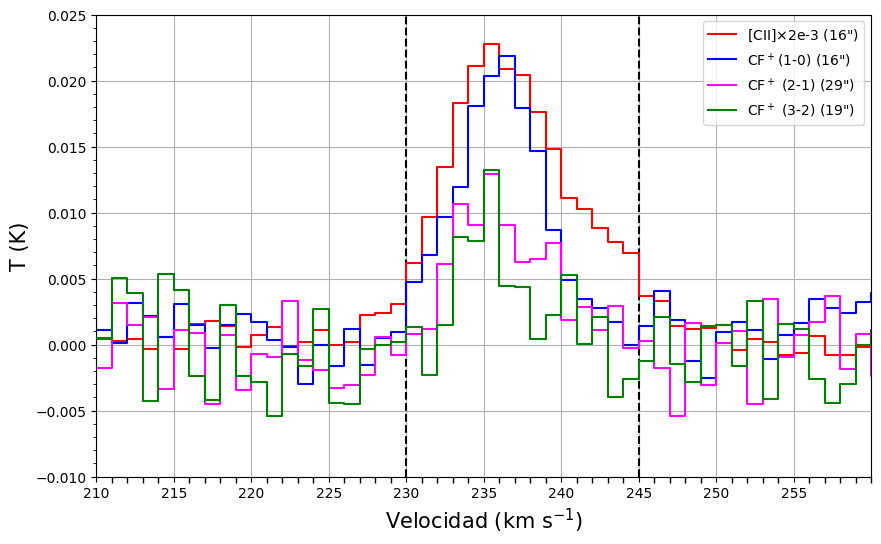

In [ ]:
# For spect2 (VEL2 is in km/s with units)
mask3 = (velocity1 >= vmin) & (velocity1 <= vmax)
vel3_filtered = velocity1[mask3]
spect3_filtered = data1[mask3]

mask4 = (velocity2 >= vmin) & (velocity2 <= vmax)
vel4_filtered = velocity2[mask4]
spect4_filtered = data2[mask4]

# Crear el plot
plt.figure(figsize=(10, 6))

plt.axvline(x=230, color='black', linestyle='--', linewidth=1.5)
plt.axvline(x=245, color='black', linestyle='--', linewidth=1.5)

plt.step(vel2_filtered, spect2_filtered*0.002, label=r'[CII]$\times2$e-3 (16")' , color='red')
plt.step(vel1_filtered, spect1_filtered, label=r'CF$^+$(1-0) (16")', color='blue')
plt.step(vel3_filtered, spect3_filtered, label=label1, color='magenta')
plt.step(vel4_filtered, spect4_filtered, label=label2, color='green')

plt.xlabel(r'Velocidad (km s$^{-1}$)', fontsize=15)
plt.ylabel(r'T' f' (K)', fontsize=15)
plt.title('')
plt.xlim(210, 260)
plt.ylim(-0.01, 0.025)

# Añadir ticks principales y subticks
plt.xticks(range(210, 260, 5))  # Ticks principales cada 5 unidades
plt.minorticks_on()  # Habilitar subticks
plt.tick_params(axis='x', which='minor', length=4, width=1, labelsize=5)  # Personalizar subticks
plt.tick_params(axis='x', which='major', labelsize=10)  # Ajustar tamaño de etiquetas principales


plt.legend()
plt.grid(True)
plt.show()